In [50]:
import pandas as pd
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Explore the Datasets
First, let's load and explore the provided datasets, housing_dataset_train and housing_dataset_test. We'll examine the structure of the datasets, check for missing values, and get an overview of the variables.

In [3]:
test_data=pd.read_csv(r'C:\Users\ayub_\AppData\Local\Temp\Temp1_free-ai-classes-in-every-city-hackathon-2023[1].zip\Housing_dataset_test.csv')
train_data=pd.read_csv(r'C:\Users\ayub_\AppData\Local\Temp\Temp1_free-ai-classes-in-every-city-hackathon-2023[1].zip\Housing_dataset_train.csv')

In [7]:
train_data.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [9]:
test_data.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [8]:
print("Training Dataset:")
print(train_data.info())

print("\nTest Dataset:")
print(test_data.info())

Training Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB
None

Test Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-n

In [13]:
print('Missing val. in train_data')
print(train_data.isna().sum())

print('\nMissing val. in test_data')
print(test_data.isna().sum())

Missing val. in train_data
ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

Missing val. in test_data
ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64


## Data Preprocessing
now,we'll handle missing values and preprocess the data to prepare it for analysis. We'll also encode categorical variables and handle any outliers.

In [15]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
columns_with_missing = ['loc', 'title', 'bedroom', 'bathroom', 'parking_space']
train_data[columns_with_missing] = imputer.fit_transform(train_data[columns_with_missing])

# Verify if missing values are handled
print(train_data.isnull().sum())

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64


In [42]:
#performing one-hot encoding for the 'loc' and 'title' columns
train_data_encoded = pd.get_dummies(train_data, columns=['loc', 'title'], drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=['loc', 'title'], drop_first=True)

In [ ]:
# Handle outliers using IQR method
Q1 = train_data_encoded[numerical_columns].quantile(0.25)
Q3 = train_data_encoded[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_data_no_outliers = train_data_encoded[~((train_data_encoded[numerical_columns] < lower_bound) | (train_data_encoded[numerical_columns] > upper_bound)).any(axis=1)]

print(train_data_no_outliers.shape)

## Exploratory Data Analysis (EDA)
Let's visualize the distribution of house prices and explore relationships between features and prices.

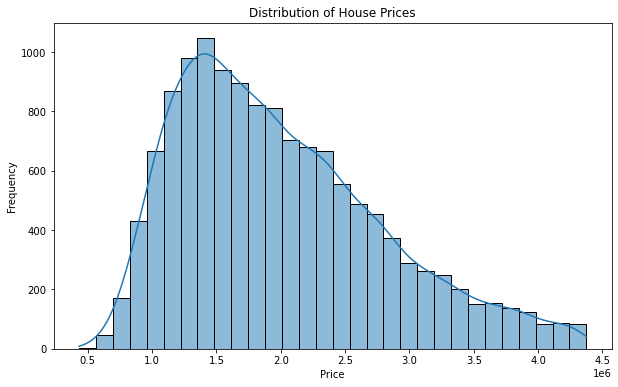

In [22]:
# Visualize the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(train_data_no_outliers['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

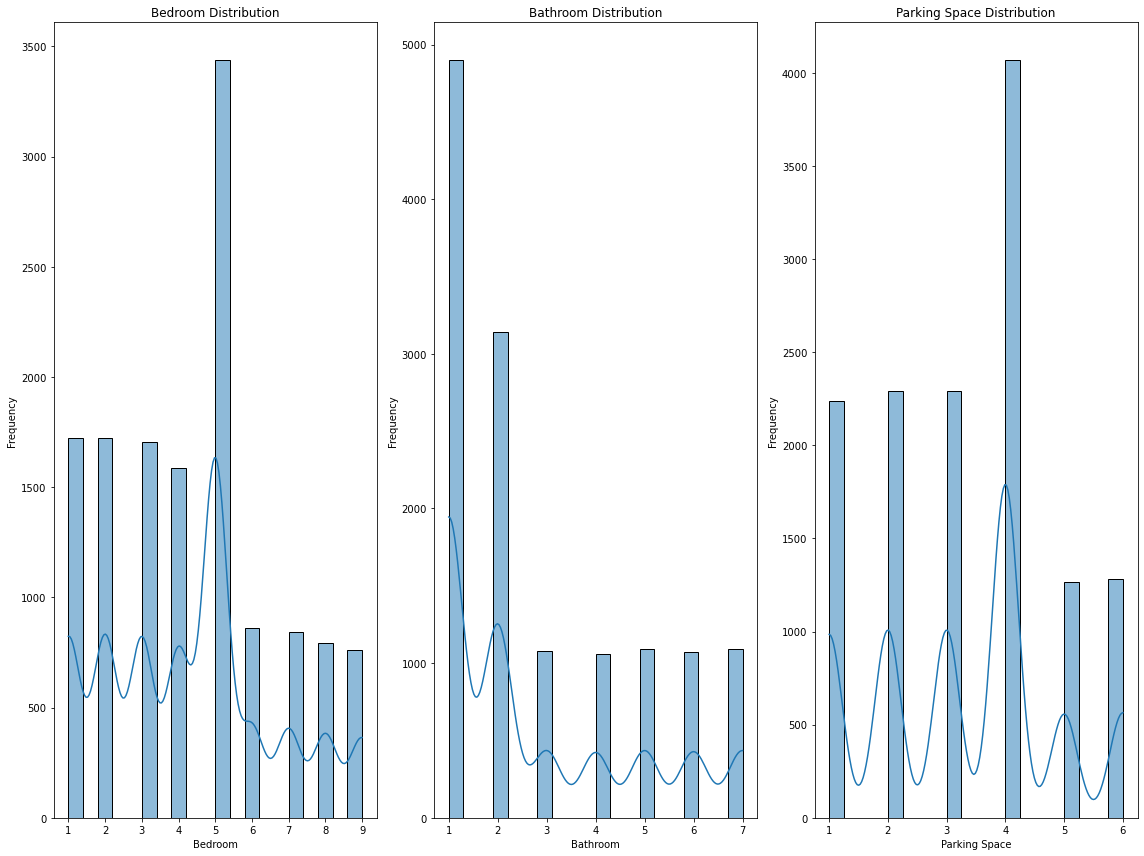

In [26]:
# Explore relationships between features and prices
plt.figure(figsize=(16, 12))

# Bedroom distribution
plt.subplot(1, 3, 1)
sns.histplot(train_data_no_outliers['bedroom'], bins=20, kde=True)
plt.title('Bedroom Distribution')
plt.xlabel('Bedroom')
plt.ylabel('Frequency')

# Bathroom distribution
plt.subplot(1, 3, 2)
sns.histplot(train_data_no_outliers['bathroom'], bins=20, kde=True)
plt.title('Bathroom Distribution')
plt.xlabel('Bathroom')
plt.ylabel('Frequency')

# Parking Space distribution
plt.subplot(1, 3, 3)
sns.histplot(train_data_no_outliers['parking_space'], bins=20, kde=True)
plt.title('Parking Space Distribution')
plt.xlabel('Parking Space')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

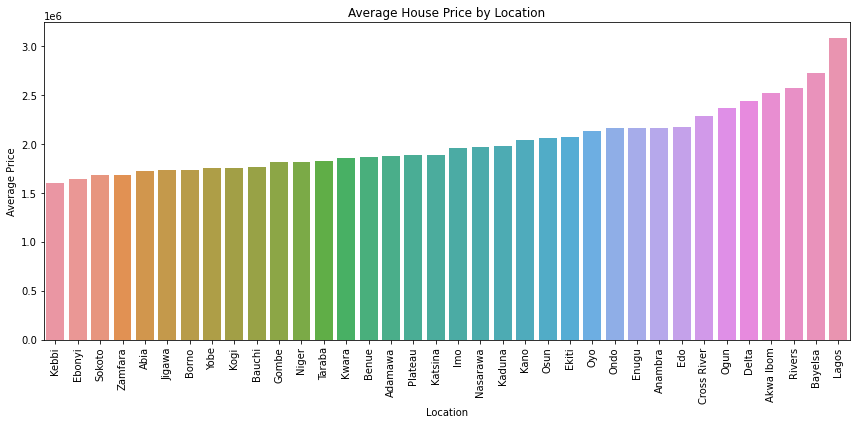

In [31]:
location_column_name = train_data['loc']

# Calculate the average price for each location
avg_price_by_location = train_data_no_outliers.groupby(location_column_name)['price'].mean().sort_values()

# Create a bar plot to visualize the relationship between location and average price
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_location.index, y=avg_price_by_location.values)
plt.xticks(rotation=90)
plt.title('Average House Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

## Model Selection
Now, let's choose a regression algorithm for building the predictive model. We'll select Linear Regression for this project.

In [62]:
# Select features and target variable
X = train_data_encoded.drop(['price'], axis=1)
y = train_data_encoded['price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation
Model evaluation performance on the validation set using the Mean Absolute Error (MAE) metric.

In [67]:
test_features = test_data_encoded
predictions = model.predict(test_features)

In [52]:
#Create a DataFrame with the 'ID' and 'price' columns for submission
submission = pd.DataFrame({'ID': test_data['ID'], 'price': predictions})
#then save to a csv file
submission.to_csv('submission.csv', index=False)

In [68]:
#Calc the Root Mean Squared Erroe(RMSE)
true_values = test_data['predicted_price']
rmse = mean_squared_error(true_values, predictions, squared=False)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.0
